In [226]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

In [236]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

def train_score(clf,xtrain,ytrain, xtest,ytest):
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    p = (conf[0, 0] / (conf[0, 0] + conf[1, 0]))
    r = (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
    f = 2*p*r/(p+r)
    
    print ('\n')
    print ("Precision:              %0.2f" % p)
    print ("Recall:                 %0.2f"% r)
    print ("F1:                     %0.2f"% f)

    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)
    
def train_score_cv(clf,X,y):
    # accuracy for test & train:
    test_acc=cross_val_score(clf, X, y).mean()
    #print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = y
    y_pred = clf.predict(X)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    p = (conf[0, 0] / (conf[0, 0] + conf[1, 0]))
    r = (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
    f = 2*p*r/(p+r)
    
    print ('\n')
    print ("Precision:              %0.2f" % p)
    print ("Recall:                 %0.2f"% r)
    print ("F1:                     %0.2f"% f)

    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [212]:

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", sep=',', names = ['Class Name','handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])
df.replace('n', 0, inplace=True)
df.replace('y', 1, inplace=True)
del df['Class Name']
for col in df.columns:
    df.replace('?', df[col].mode()[0], inplace=True)
X_ = df.loc[:, df.columns != 'religious-groups-in-schools']
y_ = df['religious-groups-in-schools']
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.30, random_state=4444)


# Challenge 1 and 2

#  KNN

In [213]:

kn = KNeighborsClassifier(11)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
accuracy_score(y_test, y_pred)

0.81679389312977102

Training Data Accuracy: 0.85
Test Data Accuracy:     0.82
[[42  9]
 [15 65]]


Precision:              0.74
Recall:                 0.82
F1:                     0.78


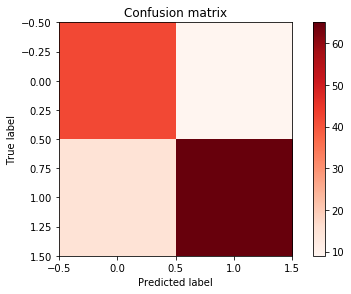

In [214]:
train_score(kn,X_train,y_train, X_test, y_test)

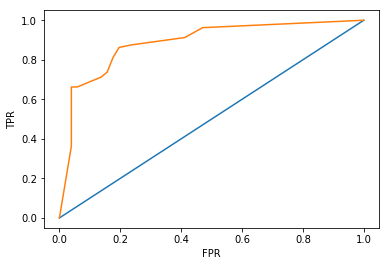

In [215]:
y_score=kn.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [216]:
print("AUC is:", roc_auc)

AUC is: 0.886274509804


# Logistic Regressor

In [217]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
print("accuracy", log_acc)

accuracy 0.839694656489


Training Data Accuracy: 0.87
Test Data Accuracy:     0.84
[[40 11]
 [10 70]]


Precision:              0.80
Recall:                 0.78
F1:                     0.79


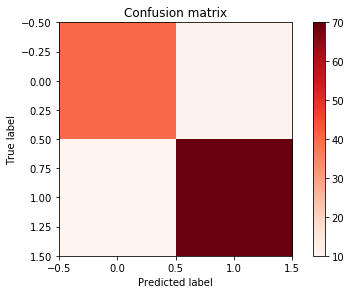

In [218]:
train_score(lr,X_train,y_train, X_test, y_test)

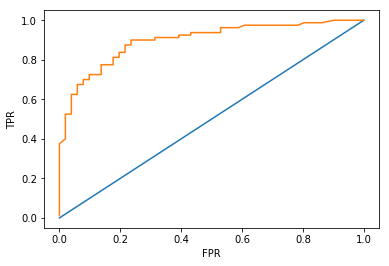

In [219]:
y_score=lr.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [220]:
print("AUC is:", roc_auc)

AUC is: 0.897794117647


# Challenge 3

## Logistic

Test Data Accuracy:     0.83
[[134  29]
 [ 34 238]]


Precision:              0.80
Recall:                 0.82
F1:                     0.81


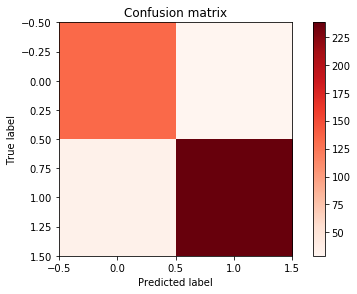

In [244]:
lr_cv = LogisticRegression()
lr_cv.fit(X_, y_)
y_pred = lr_cv.predict(X_)
accuracy_score(y_, y_pred)
train_score_cv(lr_cv,X_, y_)

## KNN

In [251]:
kn_cv = KNeighborsClassifier()
kn_cv.fit(X_, y_)
y_pred = kn_cv.predict(X_)
accuracy_score(y_, y_pred)


0.85517241379310349

Test Data Accuracy:     0.80
[[139  24]
 [ 39 233]]


Precision:              0.78
Recall:                 0.85
F1:                     0.82


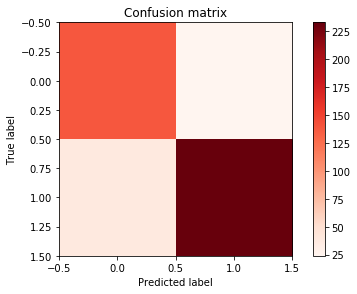

In [252]:
train_score_cv(kn_cv,X_,y_)

# Challenge 4

In [270]:
movies = pd.DataFrame.from_csv('../sf17_ds8/challenges/challenges_data/2013_movies.csv')
movies = movies[movies['Budget'].notnull()]
mX = movies[['Budget', 'DomesticTotalGross', 'Runtime']]
my = movies['Rating']
mX_train, mX_test, my_train, my_test = train_test_split(mX,my, test_size=0.30, random_state=4444)

## Class R rating

In [309]:
my_R = my.replace('PG', 0)
my_R = my_R.replace('PG-13', 0)
my_R = my_R.replace('R', 1)

In [310]:
mX_train, mX_test, my_train, my_test = train_test_split(mX,my_R, test_size=0.30, random_state=4444)

### KNN

Training Data Accuracy: 0.66
Test Data Accuracy:     0.56
[[10  8]
 [ 4  5]]


Precision:              0.71
Recall:                 0.56
F1:                     0.63


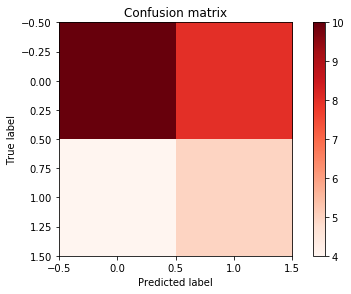

In [311]:
kn = KNeighborsClassifier(14)
kn.fit(mX_train, my_train)
my_pred = kn.predict(mX_test)
train_score(kn,mX_train,my_train, mX_test, my_test)

### Logistic Regression

Training Data Accuracy: 0.65
Test Data Accuracy:     0.63
[[16  2]
 [ 8  1]]


Precision:              0.67
Recall:                 0.89
F1:                     0.76


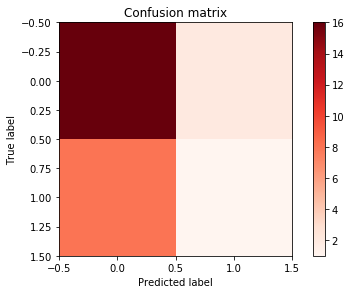

In [312]:
mlr = LogisticRegression()
mlr.fit(mX_train, my_train)
my_pred_lr = mlr.predict(mX_test)
train_score(mlr,mX_train,my_train, mX_test, my_test)

precision  = true positive / true positive + false positive   
recall = true positive/ true positive + false negative


## PG Class

In [314]:
my_PG = my.replace('R', 0)
my_PG = my_PG.replace('PG-13', 0)
my_PG = my_PG.replace('PG', 1)

In [315]:
mX_train, mX_test, my_train, my_test = train_test_split(mX,my_R, test_size=0.30, random_state=4444)

### KNN

Training Data Accuracy: 0.66
Test Data Accuracy:     0.56
[[10  8]
 [ 4  5]]


Precision:              0.71
Recall:                 0.56
F1:                     0.63


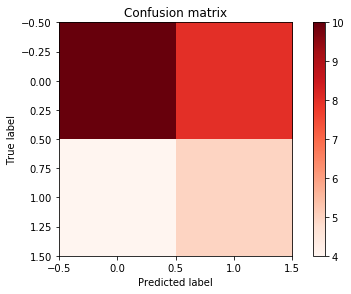

In [316]:
kn = KNeighborsClassifier(14)
kn.fit(mX_train, my_train)
my_pred = kn.predict(mX_test)
train_score(kn,mX_train,my_train, mX_test, my_test)

### Logistic Regression

Training Data Accuracy: 0.65
Test Data Accuracy:     0.63
[[16  2]
 [ 8  1]]


Precision:              0.67
Recall:                 0.89
F1:                     0.76


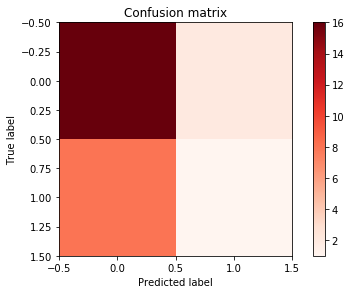

In [317]:
mlr = LogisticRegression()
mlr.fit(mX_train, my_train)
my_pred_lr = mlr.predict(mX_test)
train_score(mlr,mX_train,my_train, mX_test, my_test)

## PG-13 class

In [320]:
my_PG13 = my.replace('PG', 0)
my_PG13 = my_PG.replace('R', 0)
my_PG13 = my_PG.replace('PG-13', 1)

In [321]:
mX_train, mX_test, my_train, my_test = train_test_split(mX,my_R, test_size=0.30, random_state=4444)

### KNN

Training Data Accuracy: 0.66
Test Data Accuracy:     0.56
[[10  8]
 [ 4  5]]


Precision:              0.71
Recall:                 0.56
F1:                     0.63


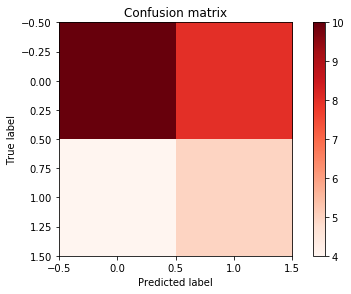

In [322]:
kn = KNeighborsClassifier(14)
kn.fit(mX_train, my_train)
my_pred = kn.predict(mX_test)
train_score(kn,mX_train,my_train, mX_test, my_test)

### Logistic Regression

Training Data Accuracy: 0.65
Test Data Accuracy:     0.63
[[16  2]
 [ 8  1]]


Precision:              0.67
Recall:                 0.89
F1:                     0.76


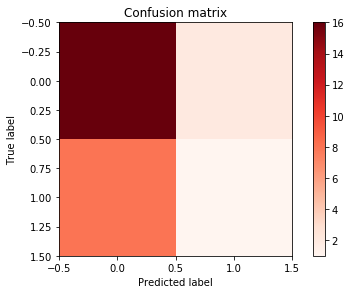

In [323]:
mlr = LogisticRegression()
mlr.fit(mX_train, my_train)
my_pred_lr = mlr.predict(mX_test)
train_score(mlr,mX_train,my_train, mX_test, my_test)

# Challenge 5

In [337]:
cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", sep=',', names = ['Age','year_operated', 'Nodes', 'survival_status'])


In [338]:
cancer.replace(1, 0, inplace=True)
cancer.replace(2, 1, inplace=True)

In [339]:
cX_train, cX_test, cy_train, cy_test = train_test_split(cancer.iloc[:,cancer.columns != 'survival_status'],cancer['survival_status'], test_size=0.30, random_state=4444)
clr = LogisticRegression()
clr.fit(cX_train, cy_train)
cy_pred = clr.predict(cX_test)

In [340]:
cancer.survival_status.value_counts()

0    225
1     81
Name: survival_status, dtype: int64

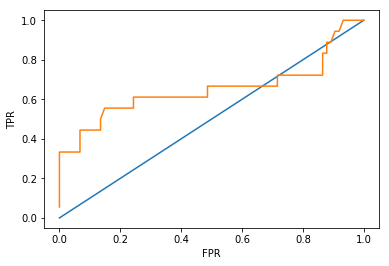

In [341]:
cy_score=clr.predict_proba(cX_test)[:,1]
fpr, tpr,_ = roc_curve(cy_test, cy_score)
roc_auc = auc(fpr, tpr)
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [343]:
print("Auc is:", roc_auc)

Auc is: 0.650525525526
